<a href="https://colab.research.google.com/github/sungjin-kim-data/ML/blob/master/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
data, target = iris["data"], iris['target']

In [8]:
pd.DataFrame(data, columns= iris['feature_names']).describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (
    data, target, test_size=0.3, random_state=42, stratify=target
)

In [10]:
print(len(X_train))
print(len(X_test))

105
45


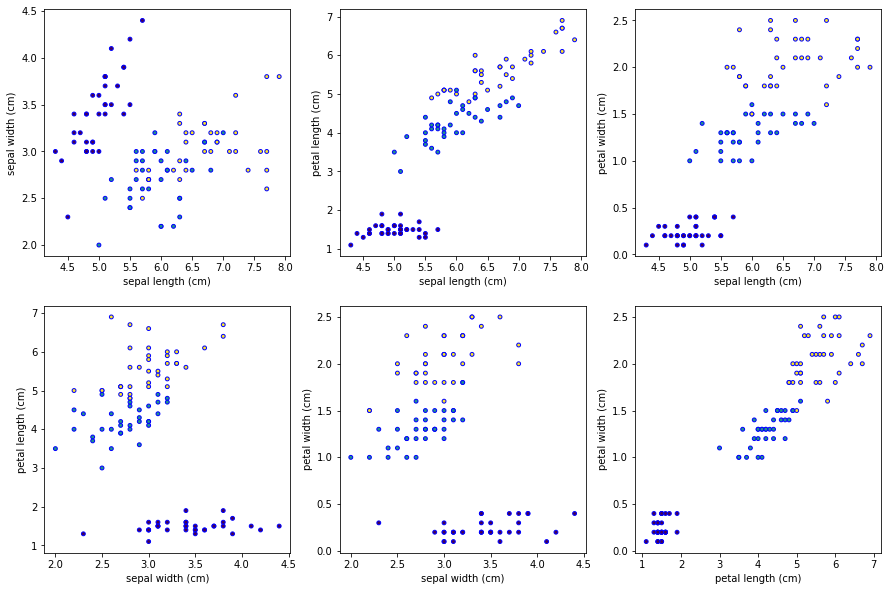

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

pair_combs = [
    [0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]
]

for idx, pair in enumerate(pair_combs):
  x ,y = pair
  ax = axes[idx//3, idx%3]
  ax.scatter (
      x=X_train[:, x], y = X_train[:, y], c = y_train, ec='b', s=15
  )
  ax.set_xlabel(iris["feature_names"][x])
  ax.set_ylabel(iris["feature_names"][y])

In [12]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [13]:
gini_tree = DecisionTreeClassifier()

In [14]:
gini_tree.fit(X_train, y_train)

DecisionTreeClassifier()

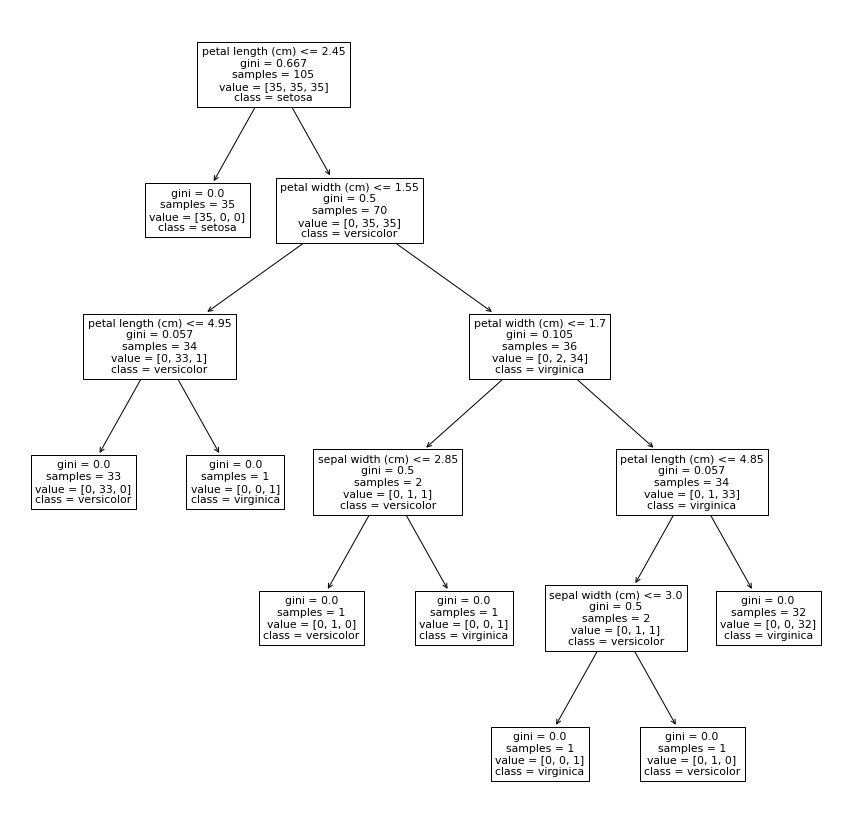

In [15]:
plt.figure(figsize=(15, 15))
plot_tree(gini_tree, feature_names=iris["feature_names"], class_names = iris["target_names"]);

In [16]:
entropy_tree = DecisionTreeClassifier(criterion = "entropy")
entropy_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

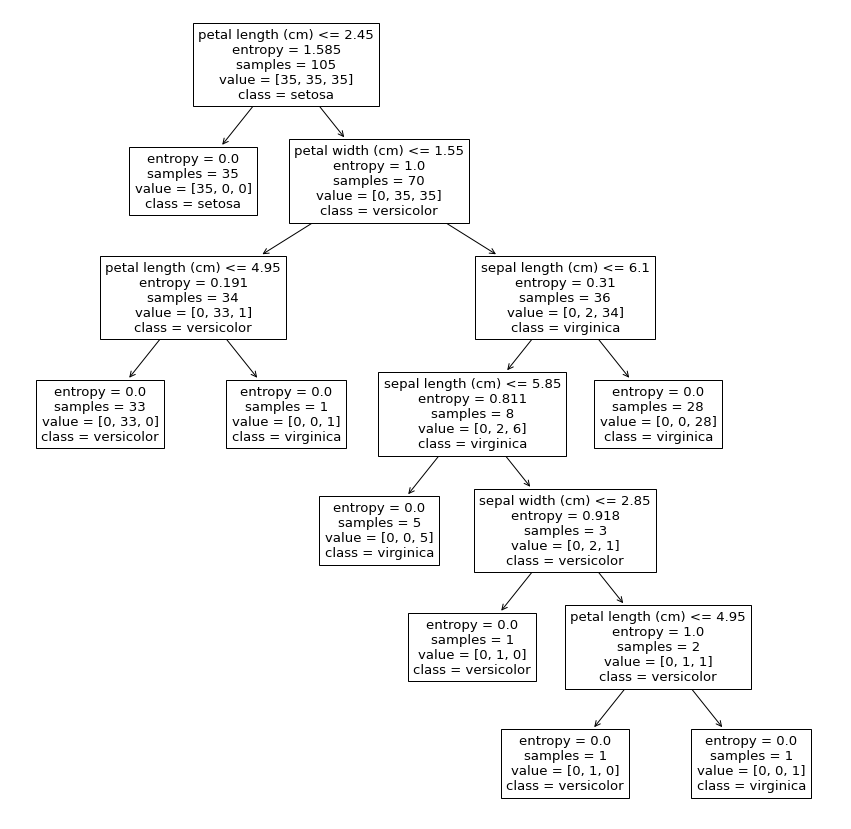

In [17]:
plt.figure(figsize=(15, 15))
plot_tree(entropy_tree, feature_names=iris["feature_names"], class_names = iris["target_names"]);

In [18]:
trees = [
    ("gini tree", gini_tree),
    ("entropy tree", entropy_tree)
]

In [19]:
train_preds = []
test_preds = []

for tree_name, tree in trees:
  train_pred = tree.predict(X_train)
  test_pred = tree.predict(X_test)
  train_preds += [train_pred]
  test_preds += [test_pred]

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
for idx, (tree_name, tree) in enumerate(trees):
  train_acc = accuracy_score(y_train, train_preds[idx])
  test_acc = accuracy_score(y_test, test_preds[idx])
  print(tree_name)
  print("\t", f"train acc is {train_acc:.2f}")
  print("\t", f"test acc is {test_acc:.2f}")


gini tree
	 train acc is 1.00
	 test acc is 0.93
entropy tree
	 train acc is 1.00
	 test acc is 0.91


In [22]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [23]:
gini_tree.feature_importances_

array([0.        , 0.02857143, 0.54117647, 0.4302521 ])

In [26]:
gini_tree.feature_importances = pd.Series(gini_tree.feature_importances_, index=iris['feature_names'])

In [27]:
gini_tree.feature_importances

sepal length (cm)    0.000000
sepal width (cm)     0.028571
petal length (cm)    0.541176
petal width (cm)     0.430252
dtype: float64

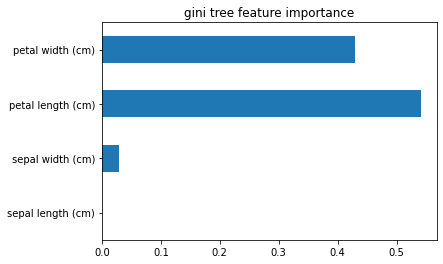

In [29]:
gini_tree.feature_importances.plot(kind='barh', title='gini tree feature importance');